<a href="https://colab.research.google.com/github/Nafisha-14/Nafisha_Nifasath/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Download the Dataset**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**2 Load the Dataset**

In [62]:
data = pd.read_csv(r"Mall_Customers.csv")


In [63]:
data.head();

**3 Perform Below Visualizations**

**Univariate Analysis**

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

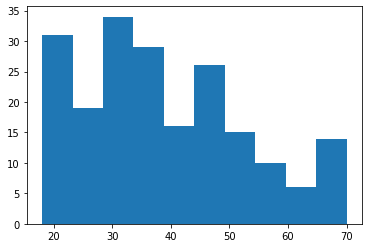

In [64]:
plt.hist(data['Age'])

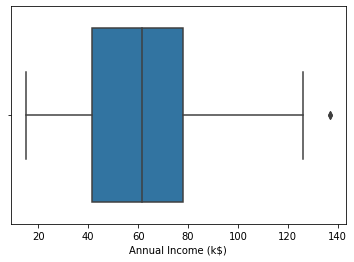

In [22]:
sns.boxplot(x=data['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)');

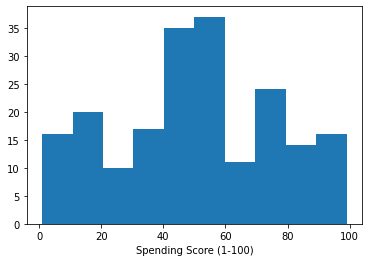

In [23]:
plt.hist(data['Spending Score (1-100)']);
plt.xlabel('Spending Score (1-100)');

**Bivariate Analysis**

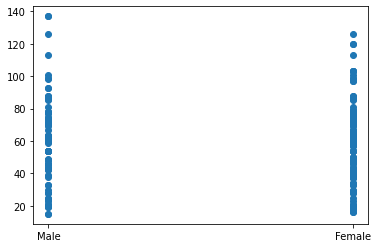

In [65]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

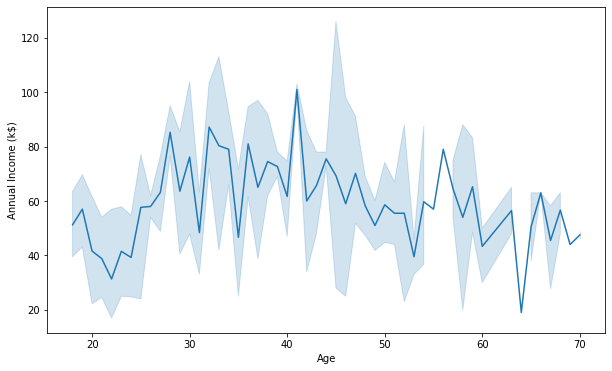

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Annual Income (k$)"]);
plt.xlabel('Age');
plt.ylabel('Annual Income (k$)');

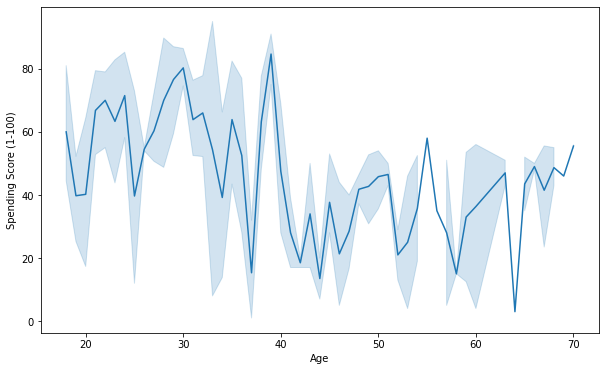

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Spending Score (1-100)"]);
plt.xlabel('Age');
plt.ylabel('Spending Score (1-100)');

**Multivariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2a2358350>,
      dtype=object)

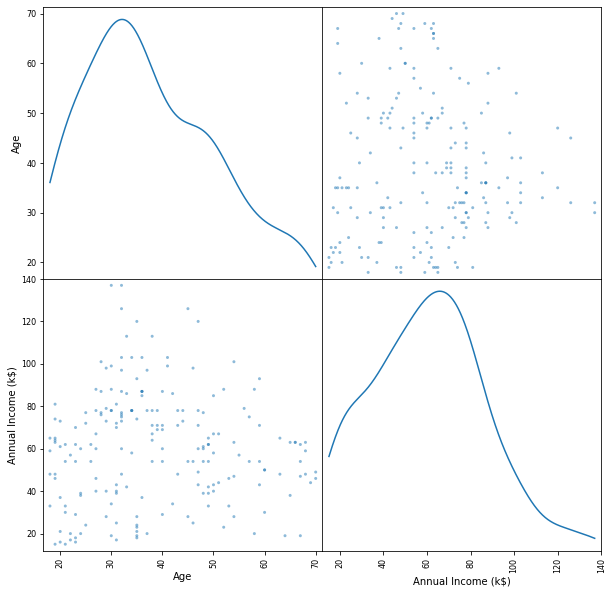

In [66]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)"] , diagonal ="kde", figsize=(10,10))

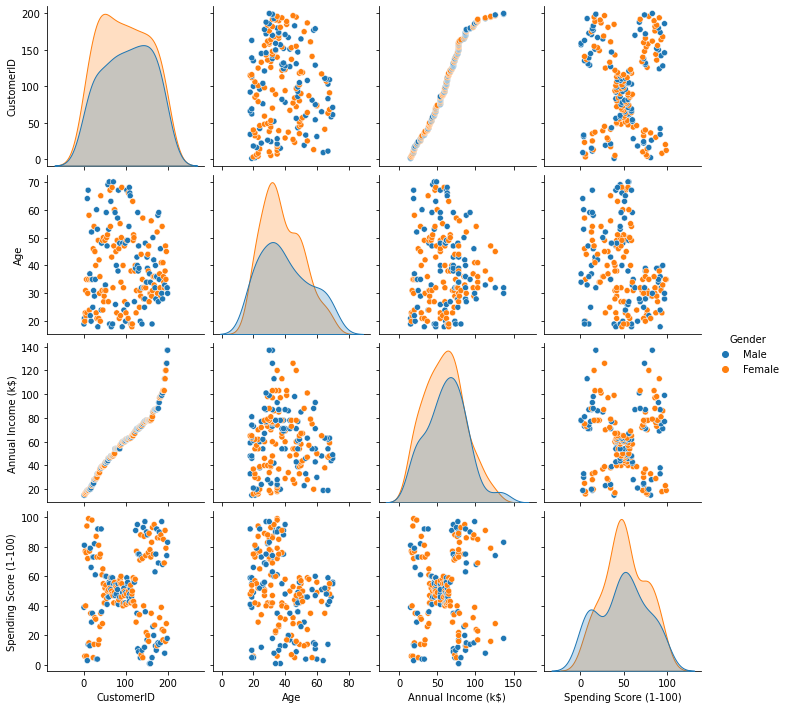

In [27]:
sns.pairplot(data, hue='Gender');

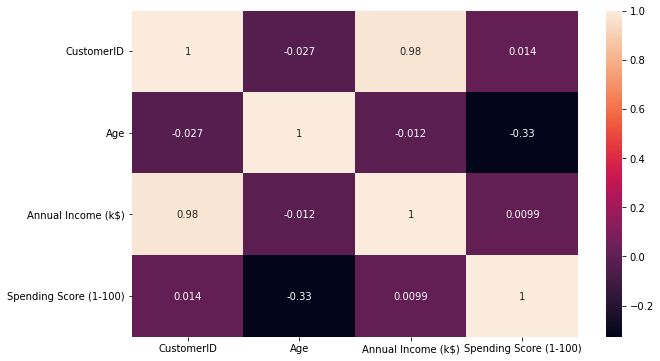

In [28]:
plt.figure(figsize=(10, 6));
sns.heatmap(data.corr(), annot=True);


**4 Perform descriptive statistics on the dataset**

In [29]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [31]:
data.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [32]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

**5 Handling Missing Values**

In [33]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**6 Find the outliers and replace them outliers**

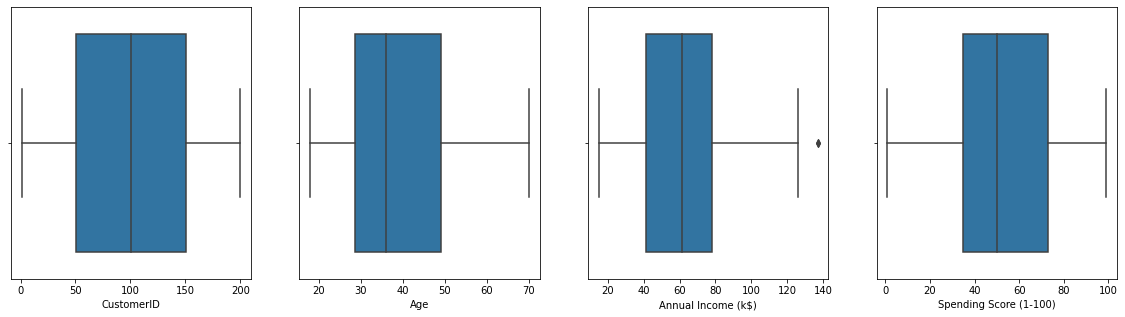

In [67]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])


**Handling Outlier**

In [68]:
quant=data.quantile(q=[0.25,0.75])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [69]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [70]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [71]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [72]:
low=quant.loc[0.25]-(1.5 *iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [74]:
up=quant.loc[0.75]+(1.5 *iqr)
up


CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [75]:
data['Annual Income (k$)']= np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])


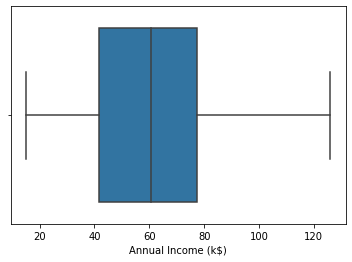

In [76]:
sns.boxplot(x=data['Annual Income (k$)'])

**7 Check for Categorical columns and perform encoding**

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
data['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [80]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,60,18


**8 Scaling the data**

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [82]:
df=sc.fit_transform(data.iloc[:,1:])

In [83]:
df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

**9 Perform any of the clustering algorithms**

Kmeans_clustering

In [84]:
from sklearn.cluster import KMeans


In [85]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [86]:
TWSS

[381550.684068407,
 268120.0915113872,
 191630.05635683762,
 153584.5918448837,
 119223.63779954851,
 101399.30522296135,
 85773.02533022534]

Text(0, 0.5, 'TWSS')

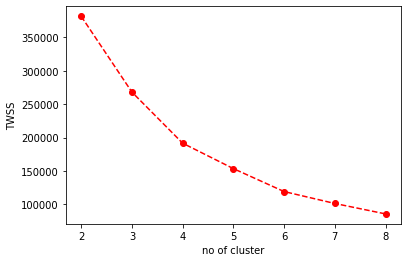

In [87]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [88]:
#selecting  4 clusters

model=KMeans(n_clusters=4)

model.fit(data)




KMeans(n_clusters=4)

In [89]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [90]:
mb=pd.Series(model.labels_)

In [91]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


**10 Add the cluster data with the primary dataset**

In [92]:
data['clust']=mb

In [93]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [94]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,60,18,1
199,200,1,30,60,83,3


**11. Split the data into dependent and independent variables**

In [95]:
#dependent
y= data['clust']
y

0      2
1      2
2      2
3      2
4      2
      ..
195    3
196    1
197    3
198    1
199    3
Name: clust, Length: 200, dtype: int32

In [96]:
#independent
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [97]:
x.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,60,18
199,1,30,60,83


**12. Split the data into training and testing**

In [98]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**13. Build the Model**

In [105]:

from sklearn.ensemble import RandomForestClassifier


In [106]:
rf=RandomForestClassifier()

**14. Train the Model**

In [107]:
rf.fit(x_train,y_train)


RandomForestClassifier()

**15 Test the model**

In [108]:
#prediction
pred=rf.predict(x_test)

**16 Measure the performance using Evaluvation Metrics**

In [110]:
# Accuracy of DI model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.975

In [111]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 8,  0,  1,  0],
       [ 0,  8,  0,  0],
       [ 0,  0, 13,  0],
       [ 0,  0,  0, 10]])